In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [2]:
IMG1 = cv.imread('./testimgs/1.jpg')[:,:,::-1]
IMG2 = cv.imread('./testimgs/2.jpg')[:,:,::-1]

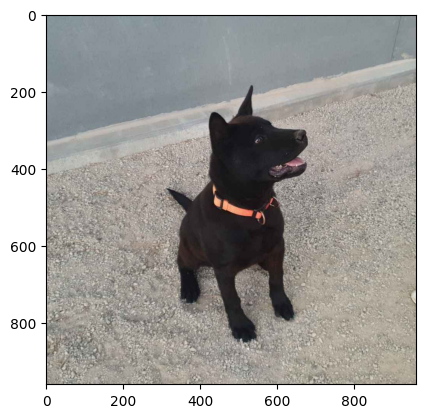

In [3]:
plt.imshow(IMG1)

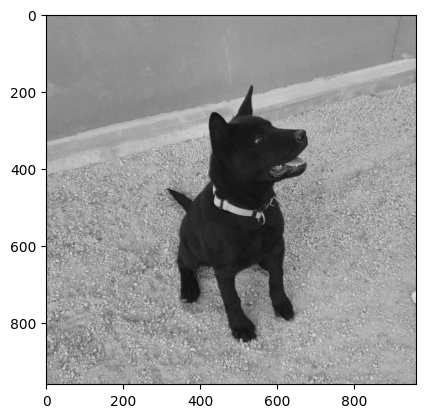

In [4]:
grayImg = cv.cvtColor(IMG1, cv.COLOR_RGB2GRAY)
plt.imshow(grayImg, cmap='gray')

In [5]:
# filter = [
# 	[-1, 0, 1],
# 	[-1, 0, 1],
# 	[-1, 0, 1],
# ]
# newImg = np.zeros_like(grayImg)
# height, width = newImg.shape
# filterHeight, filterWidth = (3, 3)

# for yy in range(height):
# 	for xx in range(width):
# 		sumOfPixel = 0
# 		for y in range(filterHeight):
# 			for x in range(filterWidth):
# 				try:
# 					sumOfPixel += filter[y][x] * newImg[yy + int((filterHeight-1) / 2) + y][xx + int((filterWidth-1) / 2) + x]
# 				except:
# 					pass
# 		newImg[yy][xx] = sumOfPixel
# 	print(f"{yy}/{height}",end='\r')

In [6]:
# plt.imshow(newImg)

In [7]:
# # 3x3 필터 정의
# filter_ = np.array([[-1, 0, 1],
#                     [-1, 0, 1],
#                     [-1, 0, 1]])

# filter_2 = np.array([[1, 0, -1],
#                     [1, 0, -1],
#                     [1, 0, -1]])

# # 컨볼루션 결과를 저장할 배열 초기화
# output_shape = (grayImg.shape[0] - filter_.shape[0] + 1,
#                 grayImg.shape[1] - filter_.shape[1] + 1)
# output = np.zeros(output_shape)

# # 컨볼루션 수행
# for i in range(output_shape[0]):
#     for j in range(output_shape[1]):
#         region = grayImg[i:i + filter_.shape[0], j:j + filter_.shape[1]]
#         k = abs(np.sum(region * filter_))
#         k2 = abs(np.sum(region * filter_2))
		
#         output[i, j] = k + k2

# # 결과를 보기 위해 출력
# output = output.astype(np.uint8)  # 8비트 이미지로 변환
# plt.imshow(output,cmap='gray')

# 속도 최적화

In [8]:
import cv2 as cv
import numpy as np
from scipy.signal import convolve2d
import matplotlib.pyplot as plt
import time

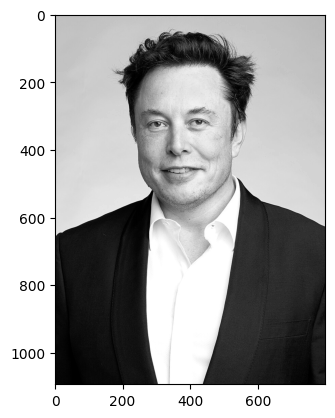

In [35]:
# 3x3 필터 정의
filter_ = np.array([[-1, 0, 1],
                    [-1, 0, 1],
                    [-1, 0, 1]])

filter_2 = np.array([[1, 0, -1],
                     [1, 0, -1],
                     [1, 0, -1]])

# 이미지 읽기
IMG1 = cv.imread('./testimgs/3.jpg')[:, :, ::-1]  # BGR -> RGB 변환
gray_image = cv.cvtColor(IMG1, cv.COLOR_RGB2GRAY)  # 흑백 이미지로 변환

plt.imshow(gray_image, cmap='gray')

In [36]:
filter_mean = np.array([[1, 1, 1, 1, 1],
						[1, 1, 1, 1, 1],
						[1, 1, 1, 1, 1],
						[1, 1, 1, 1, 1],
						[1, 1, 1, 1, 1]])

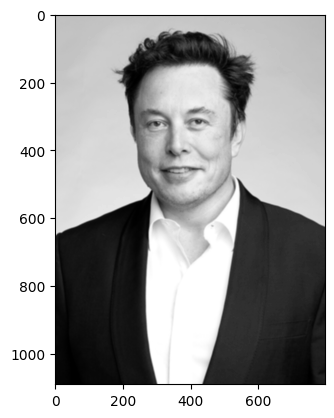

In [37]:
gray_image = convolve2d(gray_image, filter_mean, mode='valid', boundary='fill', fillvalue=0)
plt.imshow(gray_image, cmap='gray')

0.09478902816772461


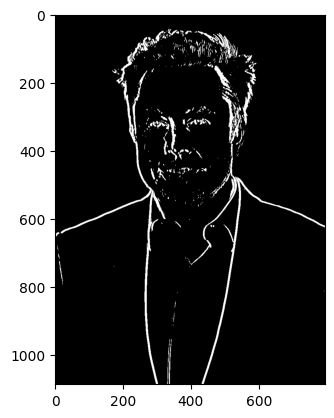

In [38]:
lastTime = time.time()

# 각각의 필터로 컨볼루션 수행
output1 = convolve2d(gray_image, filter_, mode='valid', boundary='fill', fillvalue=0)
output2 = convolve2d(gray_image, filter_2, mode='valid', boundary='fill', fillvalue=0)

# 절댓값을 더해 엣지 강도 계산
output = np.abs(output1) + np.abs(output2)
normalized_output = cv.normalize(output, None, 0, 255, cv.NORM_MINMAX).astype(np.uint8)
_, binary_output = cv.threshold(normalized_output, 30, 1, cv.THRESH_BINARY)

print(time.time() - lastTime)

plt.imshow(binary_output, cmap='gray')


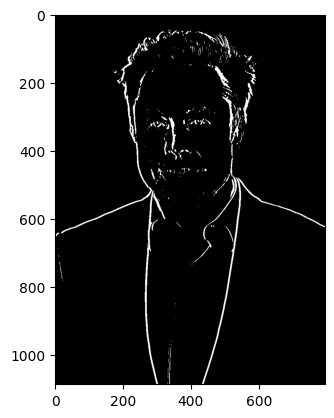

In [39]:
kernel = np.ones((2, 2), np.uint8)

changedImg1 = cv.erode(binary_output, kernel, iterations=1)

plt.imshow(changedImg1, cmap='gray')

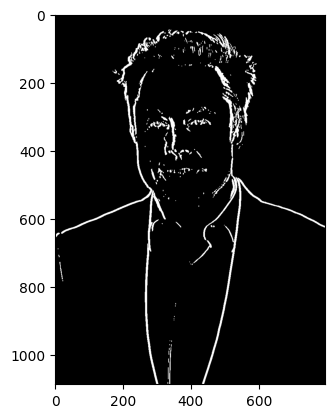

In [41]:
kernel = np.ones((2, 2), np.uint8)

changedImg2 = cv.dilate(changedImg1, kernel, iterations=1)

plt.imshow(changedImg2, cmap='gray')

In [42]:
# changedImg2

# output1 = convolve2d(changedImg2, filter_, mode='valid', boundary='fill', fillvalue=0)
# output2 = convolve2d(changedImg2, filter_2, mode='valid', boundary='fill', fillvalue=0)

# # 절댓값을 더해 엣지 강도 계산
# output = np.abs(output1) + np.abs(output2)
# output = np.where(output > 1, 1, output)

# plt.imshow(output, cmap='gray')

https://bkshin.tistory.com/entry/OpenCV-13-%EC%9D%B4%EB%AF%B8%EC%A7%80-%EC%9D%B4%EB%8F%99Translation-%ED%99%95%EB%8C%80%EC%B6%95%EC%86%8CScaling-%ED%9A%8C%EC%A0%84Rotation

https://wikidocs.net/231862

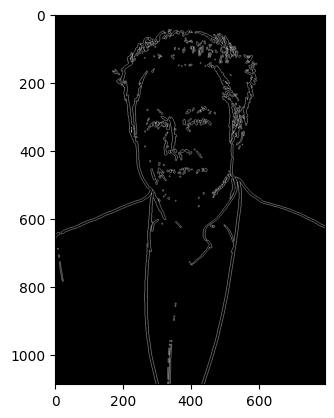

In [43]:
# changedImg3 = changedImg2.copy()

affM1 = np.array([
	[1, 0, 0],
	[0, 1, +1]
], dtype = np.float32)

affM2 = np.array([
	[1, 0, 0],
	[0, 1, -1]
], dtype = np.float32)

affM3 = np.array([
	[1, 0, +1],
	[0, 1, 0]
], dtype = np.float32)

affM4 = np.array([
	[1, 0, -1],
	[0, 1, 0]
], dtype = np.float32)

imgShape = (changedImg2.shape[1], changedImg2.shape[0])

changedImg3 = cv.warpAffine(changedImg2, affM1, imgShape) + cv.warpAffine(changedImg2, affM2, imgShape) + cv.warpAffine(changedImg2, affM3, imgShape) + cv.warpAffine(changedImg2, affM4, imgShape)
changedImg3 = np.where(changedImg3 > 0, 1, 0) - changedImg2

plt.imshow(changedImg3, cmap='gray')

In [44]:
dotListY, dotListX = np.where(changedImg3 == 1)

In [45]:
import random

In [46]:
checkLength = 2
checkList = [(x, y) for x in range(0, (checkLength-1)*2+1) for y in range(-checkLength, checkLength+1)]
checkList.remove((0, 0))
# print(checkList)

#  ? ?
#  O ?
#  ? ?

In [47]:
# sortedDots = np.array(sorted([(x, y) for x, y in zip(dotListX, dotListY)], key = lambda x : x[0]))
# dotsDict = {(x, y) : True for x, y in zip(dotListX, dotListY)}
dotsDict = {k : True for k in sorted([(x, y) for x, y in zip(dotListX, dotListY)], key = lambda x : x[0])}

while True:
	# tmp = []
	# for xx, yy in checkList:
	# 	if changedImg3[dotY + yy, dotX + xx] == 1:
	# 		tmp.append((xx, yy))
	# 		print((xx, yy))
	# dotX, dotY = sortedDots[0]
	if len(dotsDict) == 0:
		break

	# dotsDict의 첫 데이터 고름
	dotX, dotY = next(iter(dotsDict))

	dotPoses = [(dotX, dotY)]
	while True:
		possibleNextPlus = [(xx, yy) for xx, yy in checkList if dotsDict.get((dotX + xx, dotY + yy))]
		# print(tmp)
		if len(possibleNextPlus) == 0:
			dotPoses.append((dotX, dotY))
			break
		
		# 여기서 다음 칸 고르기
		nextPlusPos = possibleNextPlus[0]
		# print(nextPlusPos)

		# dotsDict[(dotX, dotY)] = False
		del dotsDict[(dotX, dotY)]
		

		dotX += nextPlusPos[0]
		dotY += nextPlusPos[1]

		dotPoses.append((dotX, dotY))
		
	print(len(dotPoses))
	break

18


In [48]:
import time

In [49]:
dotLimitByDistance = 15

dotsDict = {k : True for k in sorted([(x, y) for x, y in zip(dotListX, dotListY)], key = lambda x : x[0])}

allGraphDots = []
lastTime = time.time()

while True:
	if len(dotsDict) == 0:
		break

	# dotsDict의 첫 데이터 고름
	dotX, dotY = next(iter(dotsDict))
	dotVector = (0, 0)

	dotPoses = [(dotX, dotY)]
	del dotsDict[(dotX, dotY)]

	addDot = 0
	while True:
		possibleNextPlus = [(xx, yy) for xx, yy in checkList if dotsDict.get((dotX + xx, dotY + yy))]
		# print(tmp)
		if len(possibleNextPlus) == 0:
			dotPoses.append((dotX, dotY))
			break
		
		# 여기서 다음 칸 고르기
		nextPlusPos = possibleNextPlus[0]

		dotX += nextPlusPos[0]
		dotY += nextPlusPos[1]

		del dotsDict[(dotX, dotY)]
		# dotsDict.pop((dotX, dotY))

		addDot += 1
		if addDot > dotLimitByDistance:
			dotPoses.append((dotX, dotY))
			addDot = 0
		
	allGraphDots.append(dotPoses)

	if time.time() - lastTime > 1:
		print(f"processing... {len(dotsDict)}")
		lastTime = time.time()


In [50]:
len(allGraphDots)

1077

638 개의 그ㅐㄹ프

In [51]:
print(max([len(x) for x in allGraphDots]))

20


최대 21차

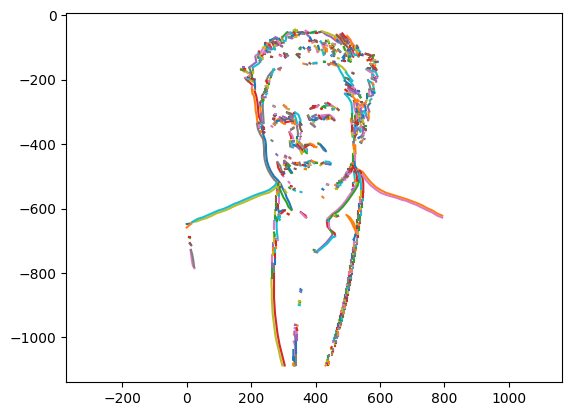

In [52]:
for data in allGraphDots:
	graphX = []
	graphY = []
	for x, y in data:
		graphX.append(x)
		graphY.append(-y)
		# print(x, y)
	# break
	plt.plot(graphX, graphY)

plt.axis('equal')

# plt.axis('off')

plt.show()

In [53]:
allGraphDots[0][0]

(0, 648)